# Setting up the environment

In [1]:
#import libraries etc for analysis

%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt
from datetime import timedelta

In [2]:
# importing Python SQL toolkit and Object Relational Mapper to be abe to use Python and SQL together, i.e. SQLAlchemy

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Column, Integer, String, Table, Date, Numeric, inspect, desc, asc

In [3]:
# Use SQLAlchemy `create_engine` to connect to your sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
inspector = inspect(engine)

In [5]:
# Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

#relect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

#view all of the classes that automap found
Base.classes.keys()

#save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
#create session (link) from Python to the database
session = Session(engine)

# Setting up tables

In [7]:
#view tables to verify what we have
inspector.get_table_names()

['measurement', 'station']

In [8]:
#inspect Measurement table
mcolumns = inspector.get_columns('Measurement')
for column in mcolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#inspect Station table
scolumns = inspector.get_columns('Station')
for column in scolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

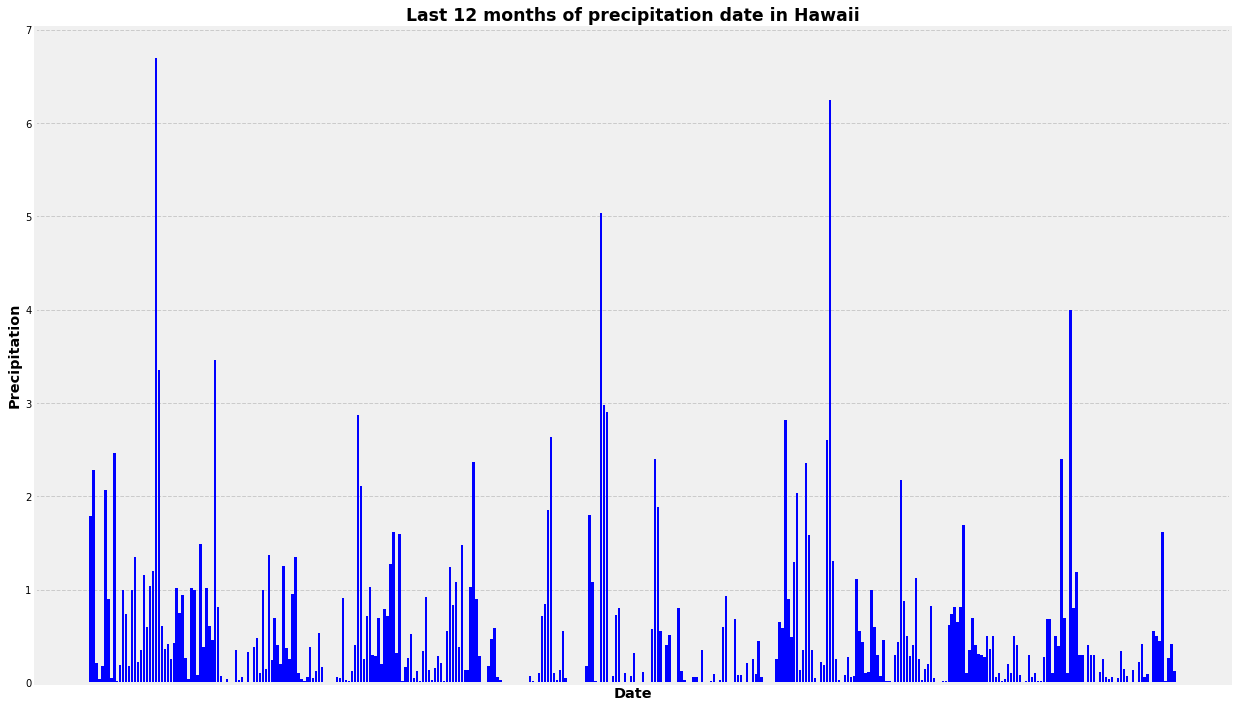

In [35]:
## (1) Design a query to retrieve the last 12 months of precipitation data and plot the results
# data needed for this analysis: precipitation data and dates

# query to view data present to be able to calculate the past year's query
precip12months = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).all()

# Calculate the date 1 year ago from the last data point in the database
date_previousyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_previousyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_previousyear).all()
#print to verify
#print(data_previousyear)

# Save the query results as a Pandas DataFrame and set the index to the date column
previousyear_df = pd.DataFrame(data_previousyear, columns=['Date', 'Precipitation'])
previousyear_df.set_index('Date')

# Sort the dataframe by date
previousyear_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
x = previousyear_df['Date']
y = previousyear_df['Precipitation']

plt.bar(x, y, color='blue')
plt.tight_layout()
plt.xticks([])
plt.xlabel('Date', fontweight='bold', fontsize='x-large')
plt.ylabel('Precipitation', fontweight='bold', fontsize='x-large')
plt.title('Last 12 months of precipitation data in Hawaii', fontweight='bold', fontsize='xx-large')
plt.grid(linestyle='--')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [36]:
## Use Pandas to calcualte the summary statistics for the precipitation data

previousyear_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
## Design a query to show how many stations are available in this dataset?

availablestations = session.query(Station).count()
availablestations

9

In [71]:
## What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

mostactivestations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(mostactivestations)

#The most active station was USC00519281, which had the most entries at 2772.

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [83]:
## Using the station id from the previous query, calculate the lowest temperature recorded, 
## highest temperature recorded, and average temperature of the most active station?

temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(temperatures)

[(54.0, 85.0, 71.66378066378067)]


In [88]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#similar query syntax to two previous queries
data_previousyeartemp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= date_previousyear).\
    filter(Measurement.station == 'USC00519281').all()

[('2016-08-23', 77.0), ('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10

TypeError: 77.0 is not a string

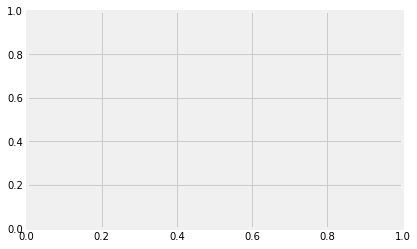

In [106]:
#plotting the histogram, using similar approach as above

previousyeartemp_df = pd.DataFrame(data_previousyeartemp, columns=['Date', 'Temperature'])
previousyeartemp_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data

#getting values for histogram

temperaturescale = session.query(Measurement.tobs).\
    group_by(Measurement.tobs).order_by(func.count(Measurement.tobs).desc()).all()

temperaturefrequency  = session.query(func.count(Measurement.tobs)).\
    group_by(Measurement.tobs).order_by(func.count(Measurement.tobs).desc()).all()


#plotting the histogram
x = previousyeartemp_df
y = temperaturefrequency

previousyeartemp_df.plt.hist(x, bins=[10])